# Project title : Fraud Delivery Executive Identification

## Objective: Identify potential fraudulent delivery executives

### Introduction:
In the rapidly expanding world of online food delivery, ensuring a reliable and ethical delivery fleet is paramount. An unethical or immoral delivery fleet can have dire consequences, including revenue loss, theft, and a tarnished reputation. According to industry reports, delivery fraud can account for up to 5% of total revenue losses in the food delivery sector.

A study found that food delivery companies in the US alone could lose over $300 million annually due to such fraudulent activities. This necessitates a robust mechanism for identifying and mitigating fraud within the delivery fleet.By analyzing patterns and behaviors within the delivery process, companies can identify anomalies that may indicate fraudulent activities.

Among various data analysis tools and algorithms, Isolation Forest algorithm has emerged as a powerful tool for identifying anomalies within large datasets. It works by isolating observations through partitioning, which makes it particularly effective for detecting outliers. In our project, we leverage the Isolation Forest algorithm to create a rough segregation of delivery riders into normal and potentially fraudulent categories.

In [1]:
# importing necessary operational libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [26]:
# loading the dataset
path = "E:\\Data Analytics stuff\\Practice\\Clustering_fraud_detection\\Rider-Info.csv"
data = pd.read_csv(path)
data.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


### Data Exploration

In [3]:
# inspecting the shape of the dataset

print(f"The dataset has total {data.shape[0]} rows and {data.shape[1]} columns")

The dataset has total 450000 rows and 20 columns


In [4]:
# inspecting the data types of the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

In [5]:
# performing statistical exploration on the data

data.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,session_time
count,450000.000000,450000.000000,450000.000000,450000.000000,433052.000000,432659.000000,450000.000000,432659.000000,449947.000000,13753.0,446325.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,1.0,220.474779
std,131146.906408,5592.880135,0.846183,1.884124,90.135492,89.639646,0.107057,1.066473,1502.976162,0.0,176.713853
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,36.000000,36.000000,0.000000,0.000000,165.000000,1.0,84.100000
50%,369842.500000,6754.000000,1.138700,2.670000,81.000000,81.000000,0.000000,0.000000,396.000000,1.0,175.550000
75%,482342.250000,11965.000000,1.853000,4.220000,147.000000,146.000000,0.000000,1.000000,948.000000,1.0,316.766667
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.0,1298.966667


It can be seen that the **allot_time, pickup_time, delivered_time** are stored in **object data format**. In order to perform arithmatic operations on these columns **we need them in datetime format**. We will convert these columns into datetime format in the feature transforamtion section.

It can also be noticed that there are several null values in the dataset. The Isolation Forest Algorithm cannot work with null values, therefore it is required to free the data of any missing value.

In [6]:
# checking the dataset for null values

print("Percent of missing values in each column: /n")
(data.isnull().sum()/data.shape[0])*100

Percent of missing values in each column: /n


order_time               0.000000
order_id                 0.000000
order_date               0.000000
allot_time               0.000000
accept_time              0.034889
pickup_time              0.538000
delivered_time           1.159556
rider_id                 0.000000
first_mile_distance      0.000000
last_mile_distance       0.000000
alloted_orders           3.766222
delivered_orders         3.853556
cancelled                0.000000
undelivered_orders       3.853556
lifetime_order_count     0.011778
reassignment_method     96.945778
reassignment_reason     96.943778
reassigned_order        96.943778
session_time             0.816667
cancelled_time          98.840444
dtype: float64

Columns such as reassignment method, reassignment reason, reassigned order, cancellation time have very high ratio of missing values,also these columns are not required for the analysis. Therefore we can drop these columns from the dataframe to make further analysis easier.

In [28]:
# checking the dataset for duplicated values

print("Number of duplicate entries in the dataframe are: ", \
      data['order_id'].duplicated().sum())

Number of duplicate entries in the dataframe are:  1


In [8]:
# imputing the missing values with mean values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
cols = ['alloted_orders','delivered_orders','undelivered_orders']
data[cols] = imputer.fit_transform(data[cols])

### Feature Engineering:

In order to identify potential fraudulent delivery executives, we need to devise some metrics to track the performance of delivery executive that differentiates the normal riders from the fraudulent ones. Using these metrics the algorith will be able to create a rough segregation of normal and anomalistic riders from the dateset. 

From the available data, we can come up with metrics such as "undelivered order ratio" for past one month, "time to deliver" order, "time to accept" order, "time to pickup" the order. The Isolation Forest Algorithm will be trained on these metrics.

We can then analyse the mean values for normal delivery executives vs the values for anomalistic delivery executives, this will help us define the threshold beyond which the observations may be concluded as anomalies in the dataset. We will then further analyse the data with anomaly.

In [9]:
# selecting the required columns from the original dataset

filtered_data = data.iloc[:, [0] + list(range(3, 8)) + [9] + list(range(10, 15)) + [18]]
(filtered_data.columns)

Index(['order_time', 'allot_time', 'accept_time', 'pickup_time',
       'delivered_time', 'rider_id', 'last_mile_distance', 'alloted_orders',
       'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'session_time'],
      dtype='object')

In [29]:
# converting date type columns into datetime columns

datetime_columns = ['order_time', 'allot_time', 'accept_time', 
                    'pickup_time', 'delivered_time']
filtered_data[datetime_columns] = filtered_data[datetime_columns].apply(pd.to_datetime)

In [30]:
# dropping observations with null values

column = ['accept_time','pickup_time','delivered_time',
          'session_time','lifetime_order_count']
filtered_data = filtered_data.dropna(subset=column)

The fraud can be carried out in one of the mentioned ways:

- The rider may take too long to accept the order after the order has been alloted. This can be due to the fact that the riders are provided waiting bonus/compensation. This increases the cost for the company and degrades the delivery experience.
- The rider may take too long to deliver the order after the order has been picked up, forcing the customer to cancel the order. This also increases the cost to company in the form of refunds, also the orders are not returned to the restaurant.
- Another anomaly is that the delivery executive has a very brief average session time (few minutes). Session time is the time in minutes before the rider have been assigned an order. Low avg session time of a rider points to incidences of fraud.

In [31]:
# extracting features from dataset for further analysis
# extracted featurs: time_to accept, time to deliver, time_to_pickup

# calculating the ratio of undelivered orders
filtered_data['undelivered_order_rate'] = filtered_data['undelivered_orders']\
/ (filtered_data['undelivered_orders'] + filtered_data['delivered_orders'])

# calculating time to accept order in minutes
filtered_data['time_to_accept_min'] = (filtered_data['accept_time'] - \
                                       filtered_data['allot_time']).dt.total_seconds()/60

# calculating time to pickup in minutes
filtered_data['time_to_pickup_min'] = (filtered_data['pickup_time'] - \
                                       filtered_data['accept_time']).dt.total_seconds()/60

# calculating time to delivery in minutes
filtered_data['time_to_deliver_min'] = (filtered_data['delivered_time'] - \
                                        filtered_data['pickup_time']).dt.total_seconds()/60

Aggregating the metrics against each delivery executive to find mean of each metric. Once done, then passing the aggregated data to the algorithm.

In [13]:
# aggregating data by rider id

grouped_data = filtered_data.groupby('rider_id').agg({
    'undelivered_order_rate': 'mean',
    'delivered_orders':'max',
    'time_to_accept_min': 'mean',
    'time_to_pickup_min': 'mean',
    'time_to_deliver_min': 'mean',
    'last_mile_distance':'mean',
    'session_time':'mean',
    'lifetime_order_count':'max'
})
grouped_data = grouped_data.reset_index()

In [14]:
# performing a statistical exploration of the data

grouped_data.describe()

,rider_id,undelivered_order_rate,delivered_orders,time_to_accept_min,time_to_pickup_min,time_to_deliver_min,last_mile_distance,session_time,lifetime_order_count
count,18918.00000,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000
mean,10948.43345,0.011796,82.496356,1.152025,14.529644,18.940315,2.914766,170.385290,626.799926
std,6266.13715,0.035425,61.846217,1.008281,7.604770,60.975092,1.062519,111.702101,1311.538678
min,0.00000,0.000000,1.000000,0.033333,0.400000,0.066667,0.000000,0.016667,1.000000
25%,5459.50000,0.000000,33.000000,0.616667,11.880484,12.940605,2.347210,93.335329,77.000000
50%,11145.50000,0.002027,85.000000,0.891667,13.825000,15.483333,2.896771,137.461111,232.000000
75%,16407.75000,0.008700,103.950448,1.344345,16.050000,18.618446,3.478000,233.705417,632.000000
max,21566.00000,0.750000,562.000000,14.950000,652.200000,4198.533333,10.120000,831.300000,30469.000000


- There are 18918 distinct riders.
- Average undelivered order rate is 0.2%.We will be calculating the average undelivered order rate for normal vs anomaly riders after the model is trained.
- From the above statstical analysis, it can be seen that the average time to pickup the order is 14 minutes approximately, still a more conservative number would be Q3 + 3IQR which is 28 minutes approximately. Values beyond 28 min of pickup time needs further analysis as they can be potential frauds.
- The average delivery distance for each rider is 3 minutes with minimum delivery distance being 0.00 km that too can be a probable fraud incidence.
- A very low acceptance time can be a signal of bot being used to accept the orders, that can be another scope of analysis.
- Average delivery time is 15.5 minutes, therefore a conservative threshold could be set at Q3 + 3IQR which is 36 min approximately.

There are riders who have been delivering orders since a long time and hence their lifetime order count is pretty high, on the other hand there are riders who have joined recently and have a very low lifetime order count. Although we will be scaling the features of the final dataset before fitting the model to the dataset, we will also have to ensure that the algorithm does not get skewed against the new riders. 

To solve this issue we will extract 'wights' which is inverse of the maximum value of lifetime orders for each rider. This  will be used as a 'sample_weight' attribute of the isolation forest algorithm. This would ensure that riders which have lesser lifetime order count are given more weightage so that the model does not identify them as anomaly on the basis of lesser lifetime order count.

In [15]:
# extracting the wights for each rider

grouped_data['weights'] = 1 / grouped_data['lifetime_order_count']

In [16]:
# selecting features for the Isolation Forest algorithm

features = ['undelivered_order_rate', 'delivered_orders', 'last_mile_distance', 
            'lifetime_order_count', 'session_time', 'time_to_accept_min', 
            'time_to_pickup_min', 'time_to_deliver_min']
X = grouped_data[features]

In [17]:
# scaling the features for better model performance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Model Training and making prediction:

In [18]:
# fitting the data to the Isolation Forest model for anomaly detection

from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators = 100, contamination=0.01, random_state=42)
iso_forest.fit(X_scaled,sample_weight=grouped_data['weights'])
grouped_data['anomaly'] = iso_forest.predict(X_scaled)
grouped_data['anomaly'] = grouped_data['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

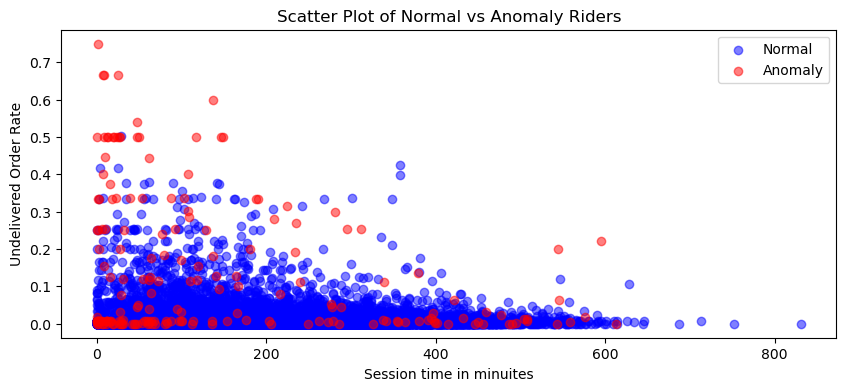

In [37]:
# comparing the undelivered orders for normal and anomaly riders

plt.figure(figsize=(10, 4))
for label, color in zip(['Normal', 'Anomaly'], ['blue', 'red']):
    subset = grouped_data[grouped_data['anomaly'] == label]
    plt.scatter(subset['session_time'], subset['undelivered_order_rate'],
                label=label, alpha=0.5, c=color)

plt.xlabel('Session time in minuites')
plt.ylabel('Undelivered Order Rate')
plt.title('Scatter Plot of Normal vs Anomaly Riders')
plt.legend()
plt.show()

- As can be seen, most of the riders have undelivered rate close to 0%, and majority of the values lies within the range 0 to 10%. This can serve as a preliminary threshold for the analysis.
- Some normal riders can be seen to have higher undelivered order rate, which can be due to less number of orders delivered in the previous 30 days.
- Note that undelivered order rate is extracted from features - delivered orders, and undelivered orders which is the data of total orders delivered in last 30 days (excluding the current date).

In [20]:
# checking the average of undelivered order rate for normal riders

avg_undlivered_normal = grouped_data[grouped_data['anomaly'] == "Normal"]['undelivered_order_rate'].mean()*100
avg_undlivered_anomaly = grouped_data[grouped_data['anomaly'] == "Anomaly"]['undelivered_order_rate'].mean()*100
print(f"The average undelivered orders for normal riders is: {avg_undlivered_normal}%")
print(f"The average undelivered orders for anomaly riders is: {avg_undlivered_anomaly}%")

The average undelivered orders for normal riders is: 1.0533758677853449%
The average undelivered orders for anomaly riders is: 13.61839152654979%


To check the outliers we can set the threshold as Q3 + 3IQR where Q3 and IQR is calculated for normal riders.

In [21]:
# obtainin the list of riders where undelivery rate greater than threshold

Q1 = grouped_data[grouped_data['anomaly'] == "Normal"]['undelivered_order_rate'].quantile(0.25)
Q3 = grouped_data[grouped_data['anomaly'] == "Normal"]['undelivered_order_rate'].quantile(0.75)
IQR = Q3 -Q1
threshold = Q3 + 3* IQR

anomaly_riders = grouped_data[grouped_data['undelivered_order_rate'] > threshold].\
sort_values(by='undelivered_order_rate',ascending = False)[['rider_id','undelivered_order_rate','anomaly']]

print("Inspecting the data for anomaly riders \n")
print(f"Number of riders having delivery time greater than threshold: {anomaly_riders.rider_id.nunique()}")
print(anomaly_riders.head())

Inspecting the data for anomaly riders 

Number of riders having delivery time greater than threshold: 1425
       rider_id  undelivered_order_rate  anomaly
17602     20095                0.750000  Anomaly
17925     20448                0.666667  Anomaly
9882      11624                0.666667  Anomaly
15297     17583                0.666667  Anomaly
17897     20415                0.600000  Anomaly


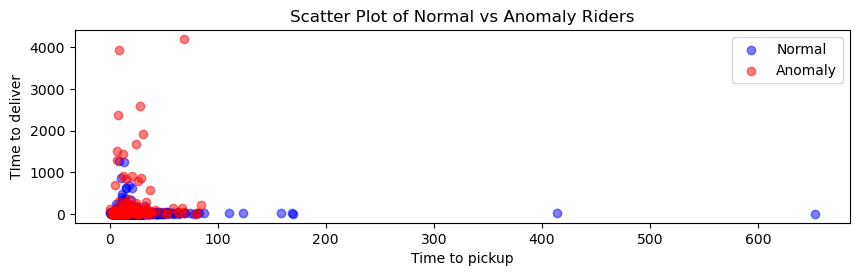

In [39]:
# comparing the delivery time of normal riders vs anomaly riders

plt.figure(figsize=(10, 2.5))
for label, color in zip(['Normal', 'Anomaly'], ['blue', 'red']):
    subset = grouped_data[grouped_data['anomaly'] == label]
    plt.scatter(subset['time_to_pickup_min'], subset['time_to_deliver_min'], label=label, alpha=0.5, c=color)

plt.xlabel('Time to pickup')
plt.ylabel('TIme to deliver')
plt.title('Scatter Plot of Normal vs Anomaly Riders')
plt.legend()
plt.show()

From the graph it can be seen that most of the deliery times lies within 200 minutes. Lets see the average delivery time for normal riders.

In [43]:
# checking the average of delivery time for normal riders

avg_delivery_time = grouped_data[grouped_data['anomaly'] == "Normal"]\
['time_to_deliver_min'].mean()

avg_delivery_time_anomaly = grouped_data[grouped_data['anomaly'] == "Anomaly"]\
['time_to_deliver_min'].mean()

print(f"The avg. delivery time for normal riders is: {avg_delivery_time} minutes")
print(f"The avg. delivery time for normal riders is: {avg_delivery_time_anomaly} minutes")

The average delivery time for normal riders is: 17.249780340394334 minutes 
The average delivery time for normal riders is: 185.57360751850686 minutes 


The average delivery time for anomalistic riders is approx 185 minutes while for normal riders the delivery time is significantly less, which is 17 minutes.

In [41]:
# obtainin the list of top riders where undelivery rate greater than threshold

Q1 = grouped_data[grouped_data['anomaly']=="Normal"]['time_to_deliver_min'].quantile(0.25)
Q3 = grouped_data[grouped_data['anomaly']=="Normal"]['time_to_deliver_min'].quantile(0.75)

IQR = Q3 -Q1
threshold = Q3 + 3* IQR

anomaly_rider_del_time = grouped_data[grouped_data['time_to_deliver_min'] > threshold].\
sort_values(by='time_to_deliver_min',ascending = False)[['rider_id','time_to_deliver_min','anomaly']]

print("Inspecting the data for anomaly riders \n")
print("Number of riders having delivery time greater than threshold: ",
      anomaly_rider_del_time.rider_id.nunique())
print(anomaly_rider_del_time.head())

Inspecting the data for anomaly riders 

Number of riders having delivery time greater than threshold:  456
       rider_id  time_to_deliver_min  anomaly
15706     18032          4198.533333  Anomaly
16720     19122          3945.133333  Anomaly
17201     19649          2591.350000  Anomaly
15040     17309          2373.244444  Anomaly
12264     14394          1911.400000  Anomaly


### Future Scope of project:

  1. Additional data would be required to identify the scale of fraud for anomalistic riders based on the average order values.
  2. Data such as total time online can also give a good idea on the session behavior of riders.
  3. The data can be further analysed to identify the time slots where the count of undelivered orders is high to implement stronger supervision.
  4. Terminal data on lat, lon for anomalistic riders can unearth potential trend / pattern strengthening the premise.